# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [35]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,943.000000
mean,66.420792,64.930693,70.289109,1494.599010,NaN,2021.104950,15.483563
std,15.481187,18.990769,19.125831,291.537945,NaN,7.681396,1.151707
min,13.000000,15.000000,23.000000,1000.000000,NaN,1990.000000,14.000000
25%,56.000000,54.000000,58.000000,1242.250000,NaN,2023.000000,14.000000
50%,66.000000,68.000000,68.000000,1494.500000,NaN,2023.000000,16.000000
75%,77.000000,78.000000,79.000000,1746.750000,NaN,2023.000000,17.000000
max,120.000000,100.000000,100.000000,1999.000000,NaN,2023.000000,17.000000


In [36]:
# Address, Mathc Scoe, 120, year 1990, id student
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [37]:
# Address no sirve para nada
df.shape

(1010, 12)

In [38]:
df.isna().sum()

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1010
Year                              0
Age                              67
dtype: int64

## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [56]:
df['id_student'] = df['id_student'].astype (str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       941 non-null    object 
 1   race/ethnicity               941 non-null    object 
 2   parental level of education  941 non-null    object 
 3   lunch                        941 non-null    object 
 4   test preparation course      941 non-null    object 
 5   math score                   941 non-null    int64  
 6   reading score                941 non-null    int64  
 7   writing score                941 non-null    int64  
 8   id_student                   941 non-null    object 
 9   Year                         941 non-null    int64  
 10  Age                          879 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 88.2+ KB


### 2. Explore the columns that are objects (string)

In [57]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 20 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(20, len(df[col].value_counts()))])
        print(" ")
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        unique_count = df[col].nunique()
        print (unique_count)
        # plot histograms
        if unique_count < 50:
            fig = sns.catplot(x=col, kind="count", data=df)
            fig.set_xticklabels(rotation=90)
            plt.show()

categorical_eda(df)

To check: Unique count of non-numeric data
Series([], dtype: float64)
Top 20 unique values of gender
    Count  count
0    MALE    493
1  FEMALE    448
 
Top 20 unique values of race/ethnicity
     Count  count
0  group C    309
1  group D    246
2  group B    190
3  group E    123
4  group A     73
 
Top 20 unique values of parental level of education
                Count  count
0        some college    212
1         high school    192
2  associate's degree    192
3    some high school    176
4   bachelor's degree    106
5     master's degree     63
 
Top 20 unique values of lunch
          Count  count
0      standard    611
1  free/reduced    330
 
Top 20 unique values of test preparation course
       Count  count
0       none    632
1  completed    309
 
Top 20 unique values of id_student
   Count  count
0   1999      1
1   1000      1
2   1001      1
3   1002      1
4   1003      1
5   1004      1
6   1005      1
7   1006      1
8   1007      1
9   1008      1
10  1009      1
11

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [41]:
df ['gender'] = df ['gender'].str.upper()
df ['gender'].value_counts()

gender
MALE      524
FEMALE    486
Name: count, dtype: int64


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
math score,941.0,66.217853,15.447865,13.0,55.0,66.0,77.0,100.0
reading score,941.0,64.724761,19.033166,15.0,53.0,67.0,78.0,100.0
writing score,941.0,69.978746,19.183813,23.0,57.0,68.0,79.0,100.0
Year,941.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
Age,879.0,15.494881,1.151273,14.0,14.0,16.0,17.0,17.0


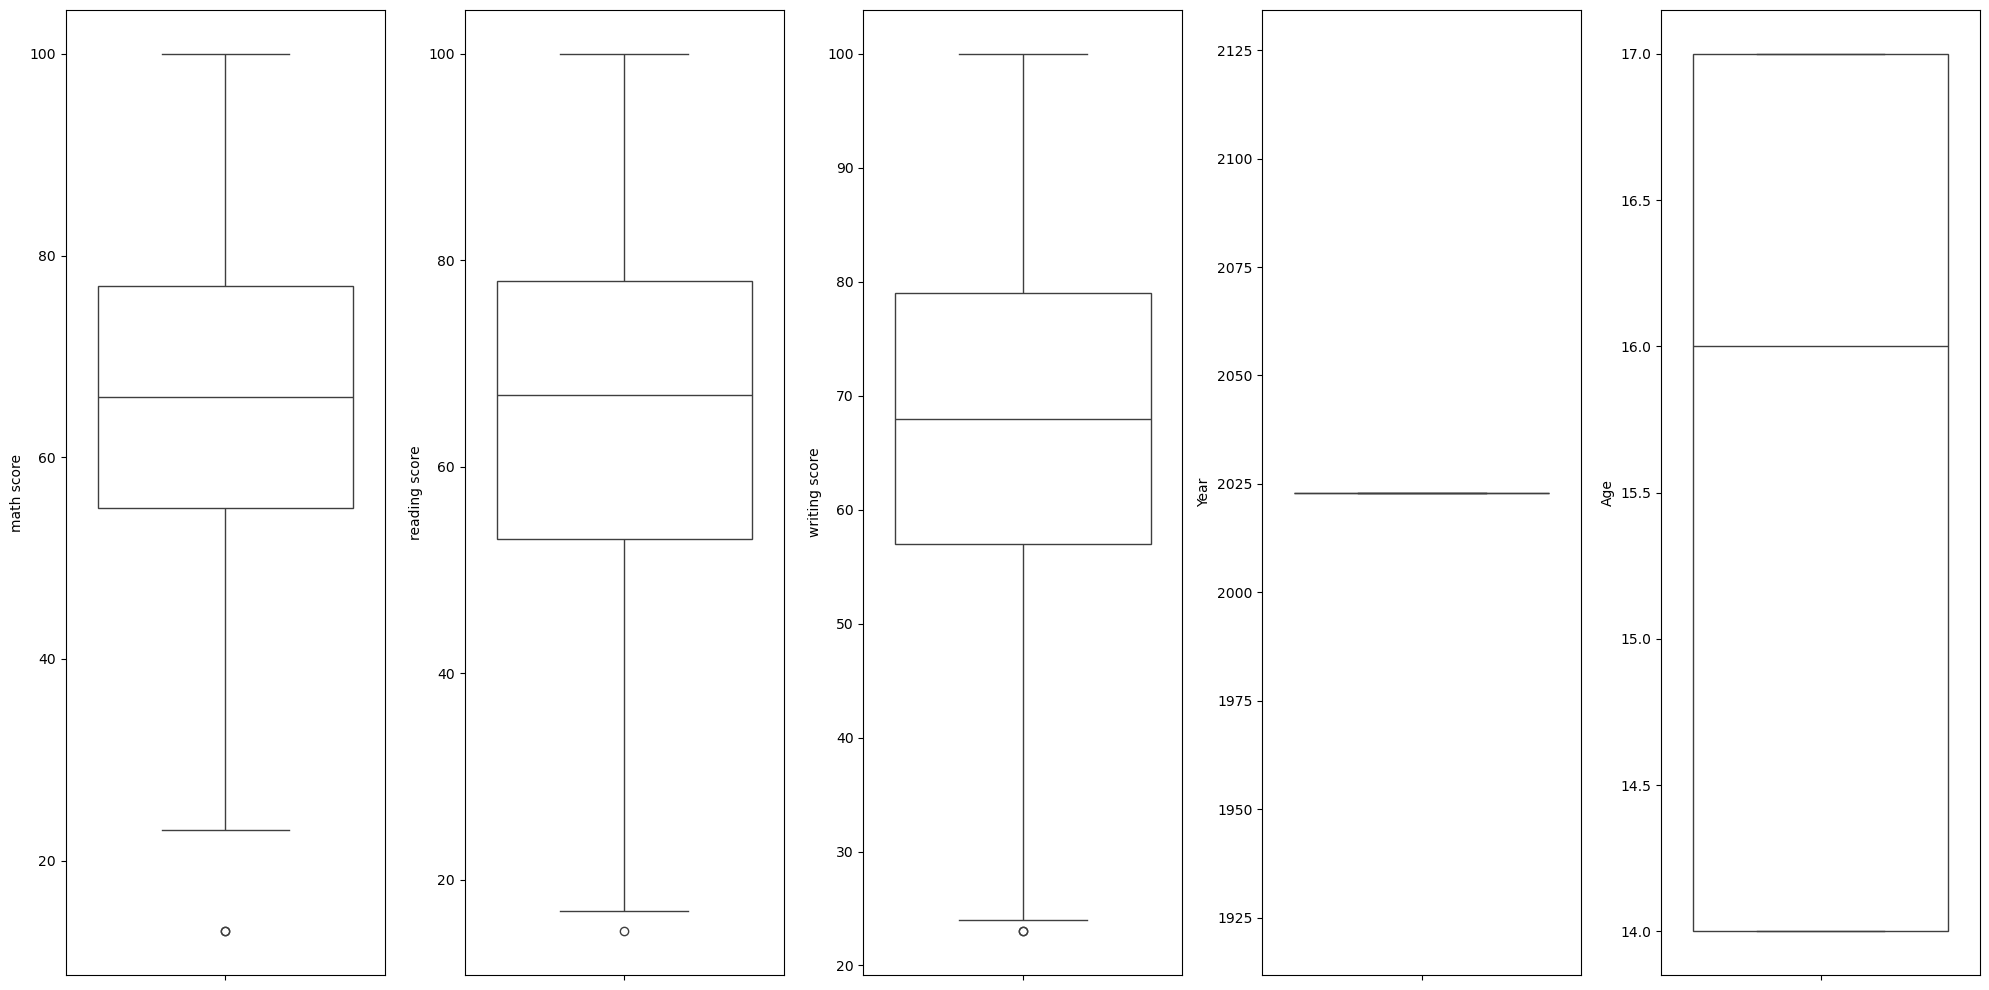


To check pairwise joint distribution of numeric data


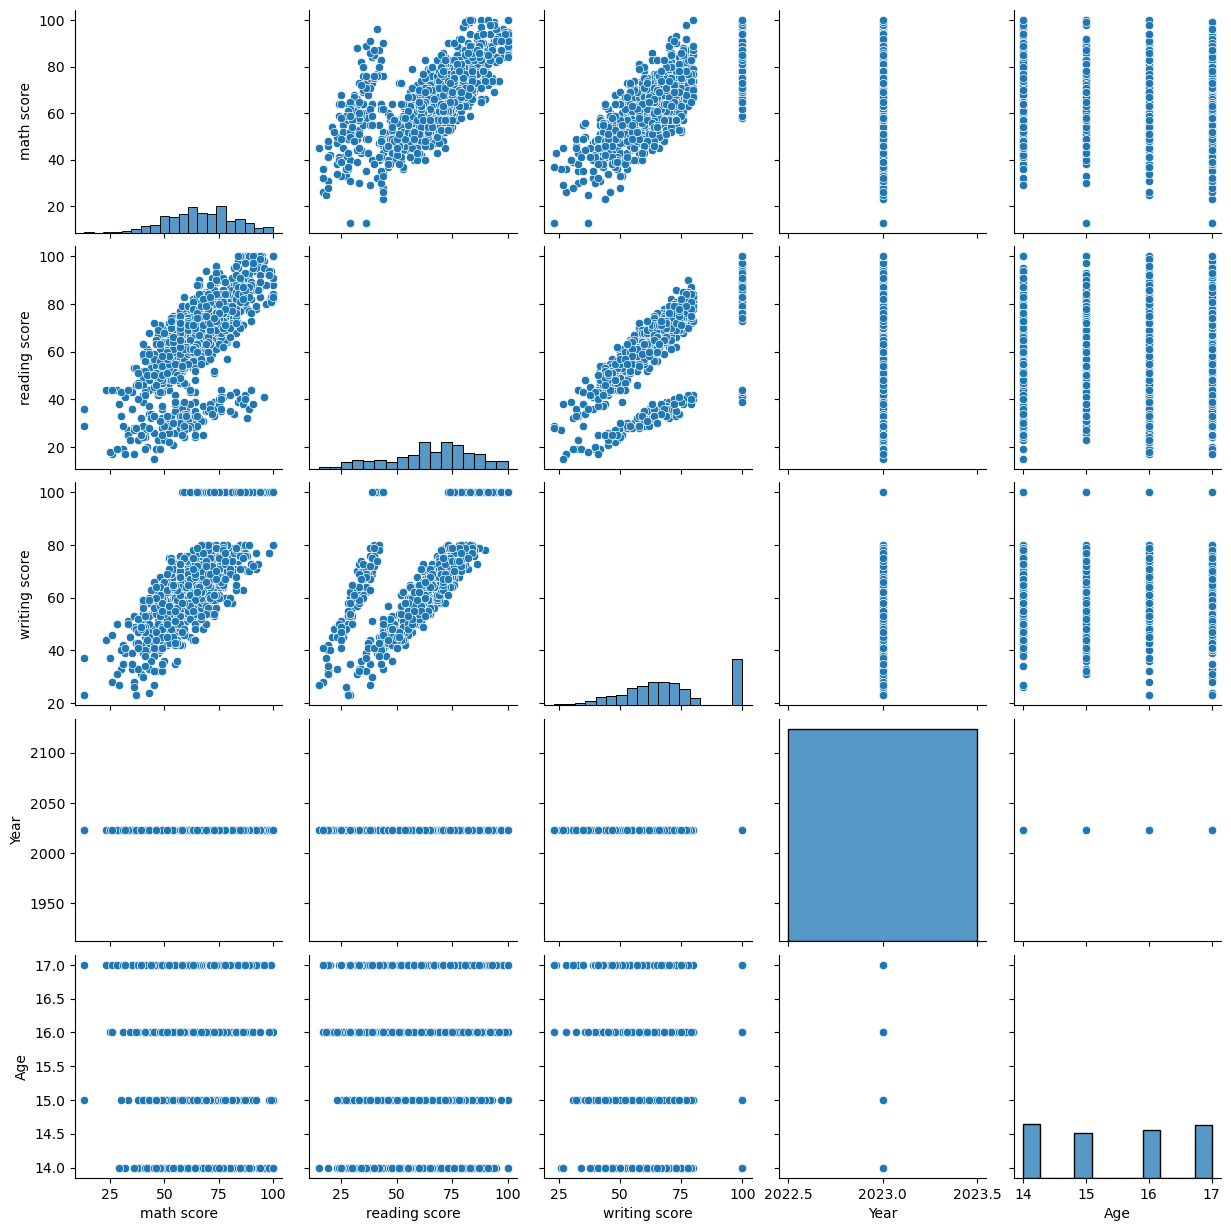

In [54]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                unique_count = df[col].nunique()
                # plot histograms
                if unique_count < 100:
                    fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                    fig.set_xticklabels(rotation=90)
                    plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

numeric_eda(df)

### 4. What may be happening with the year? 

### 5. Do we have any duplicates? 

In [43]:
# suprimir duplicados
df = df.drop_duplicates()
df.shape

(1000, 12)

### 6.1. Missing values: Remember the column address

In [49]:
# remove address
df = df.drop ('address', axis =1)
df.shape

(941, 11)

### 6.2. What about the missing values of the column Age? 

In [50]:
#df['Year'] = df['Year']
#df['Year'] = df['Year'].replace('1990', '2023')
df = df[df['Year'] != 1990]
df.shape

(941, 11)

### 7. What is going on with the math scores?

In [51]:
# mostrar el dataframe
df[df['math score'] > 100]

# quitar el valor
df = df[df['math score'] < 105]

## Do some initial plots? EDA


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
math score,941.0,66.217853,15.447865,13.0,55.0,66.0,77.0,100.0
reading score,941.0,64.724761,19.033166,15.0,53.0,67.0,78.0,100.0
writing score,941.0,69.978746,19.183813,23.0,57.0,68.0,79.0,100.0
Year,941.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
Age,879.0,15.494881,1.151273,14.0,14.0,16.0,17.0,17.0


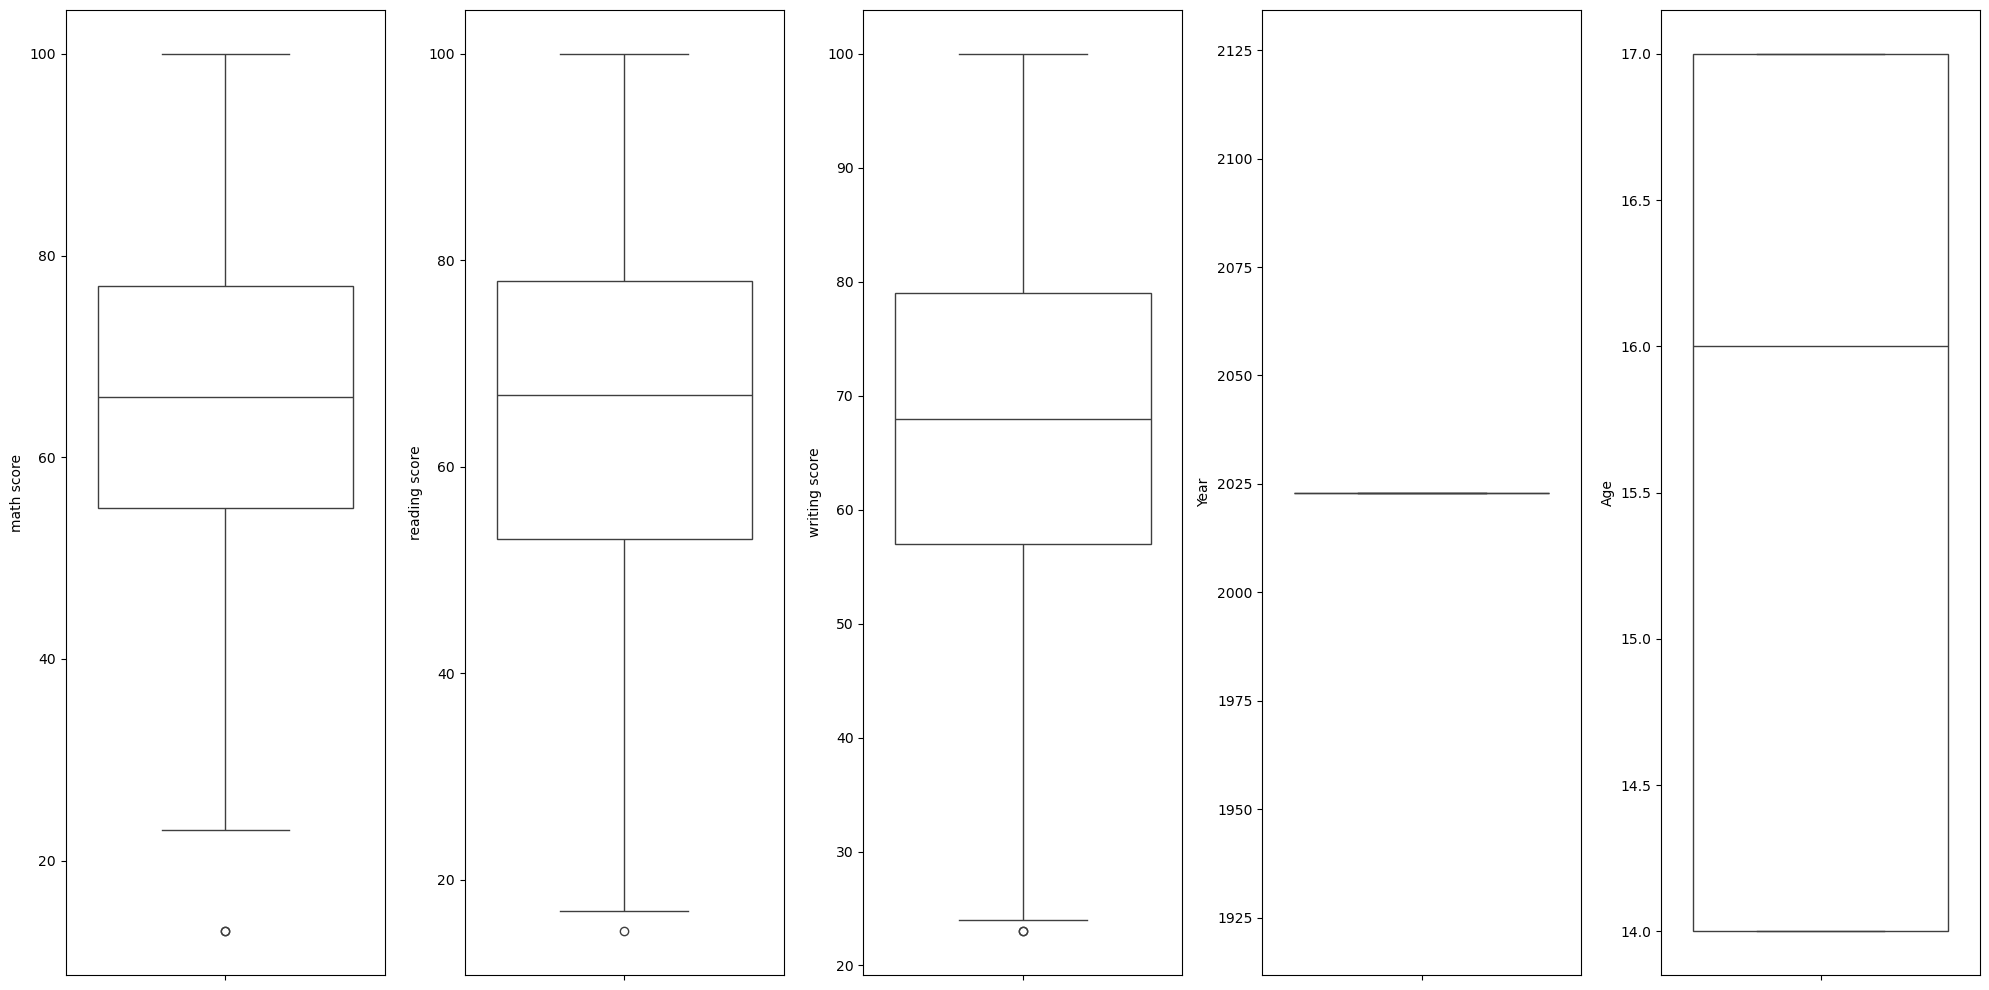


To check pairwise joint distribution of numeric data


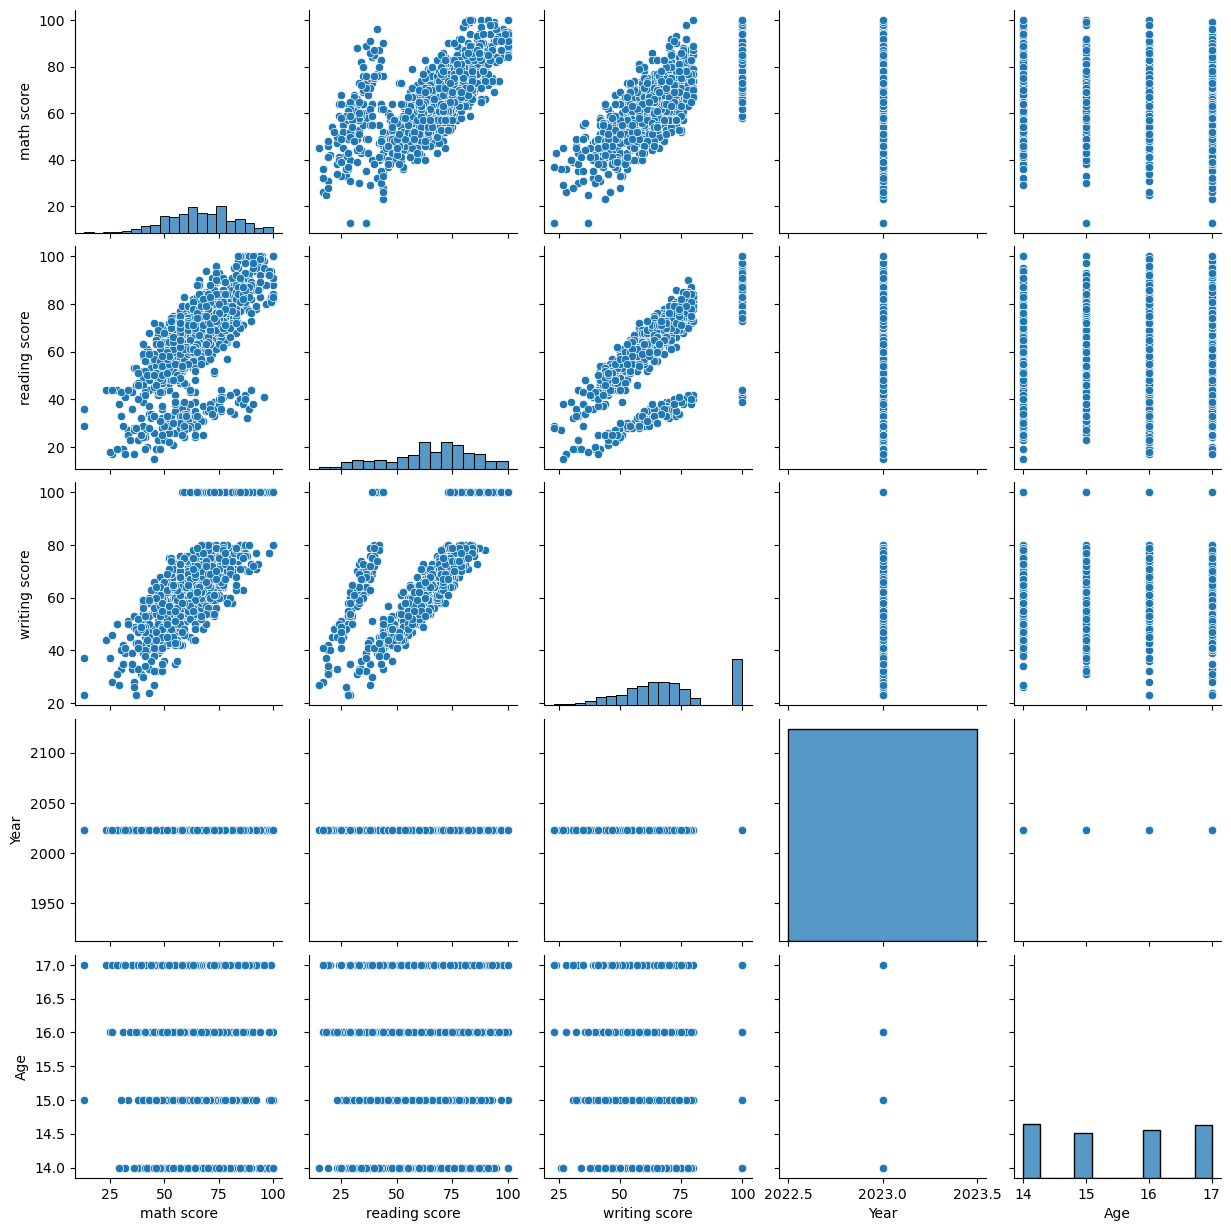

In [52]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                unique_count = df[col].nunique()
                # plot histograms
                if unique_count < 50:
                    fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                    fig.set_xticklabels(rotation=90)
                    plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

numeric_eda(df)

gender
race/ethnicity
parental level of education
lunch
test preparation course
id_student


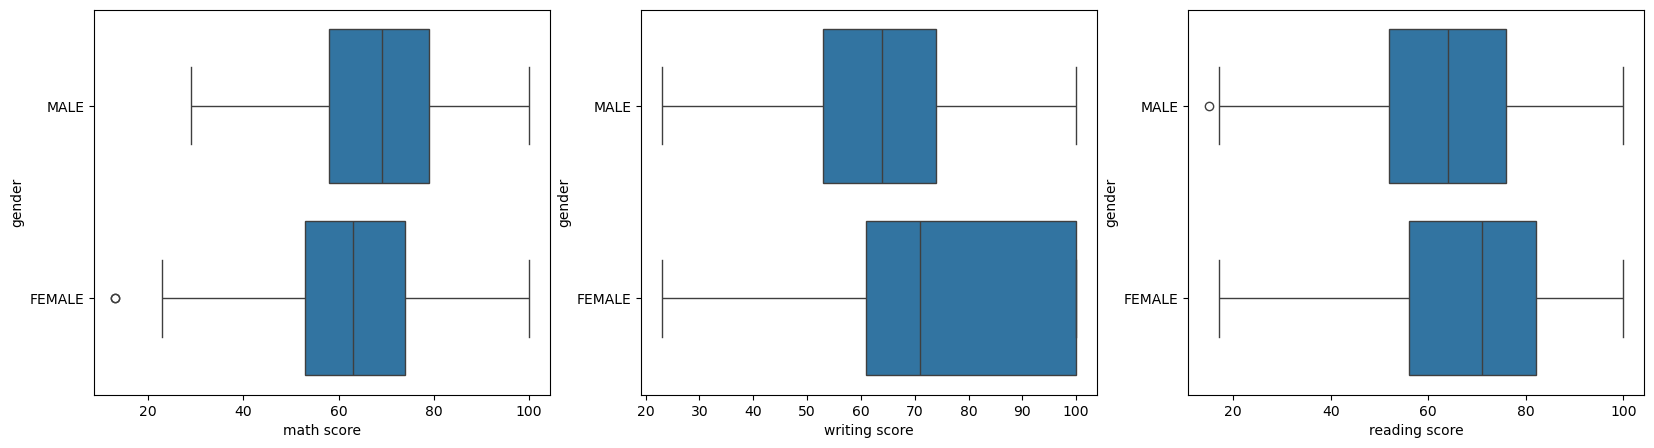

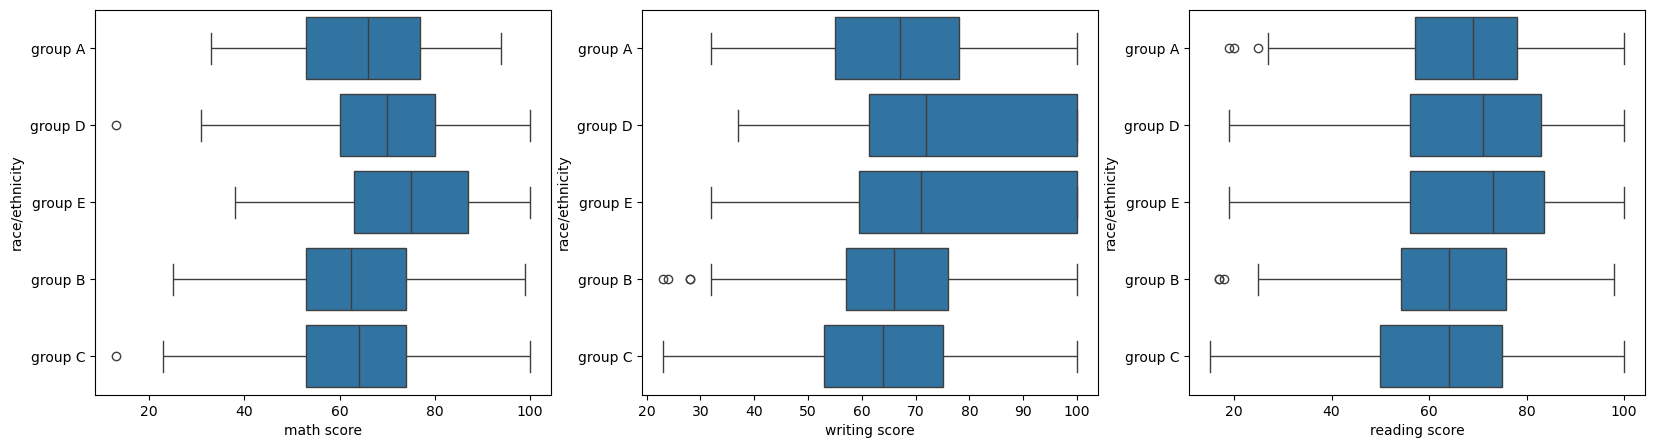

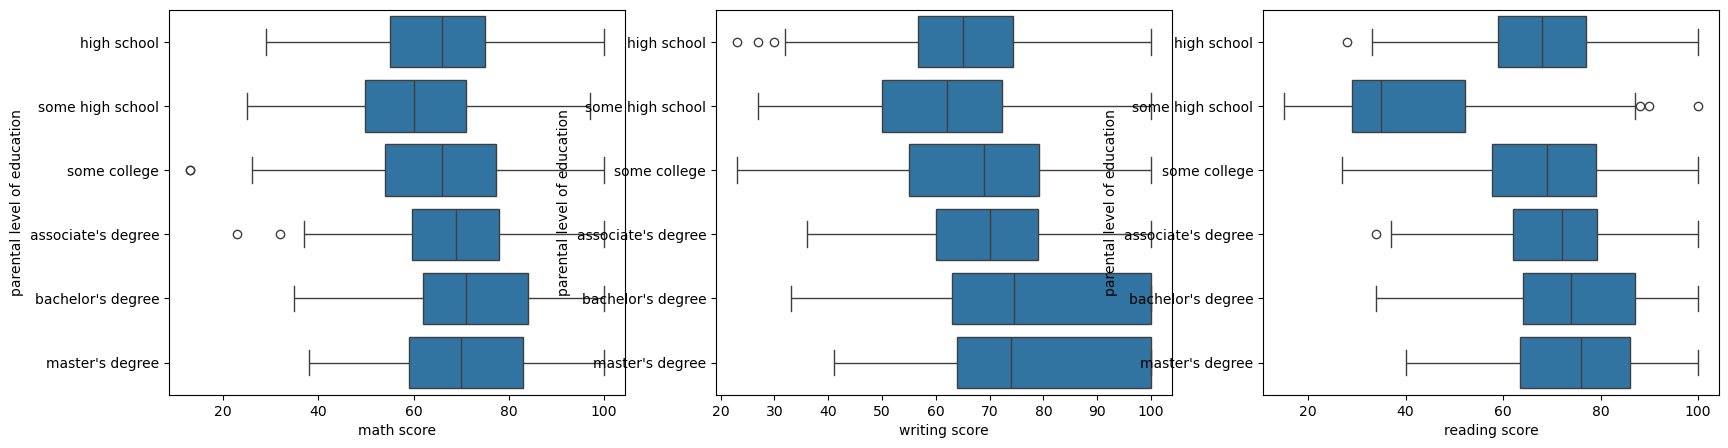

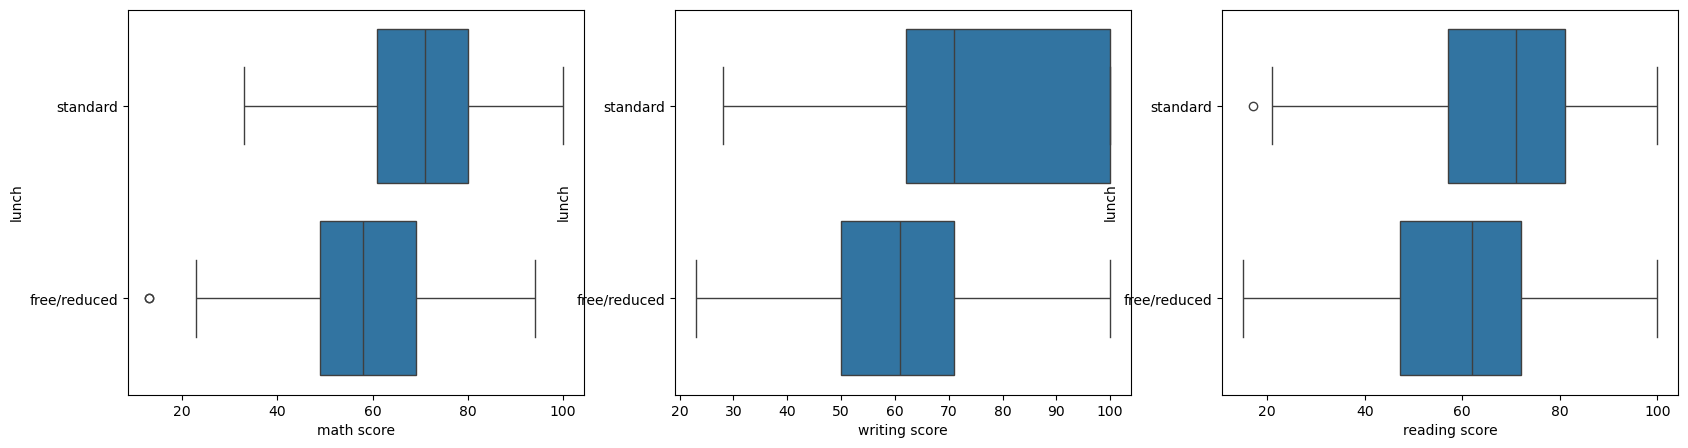

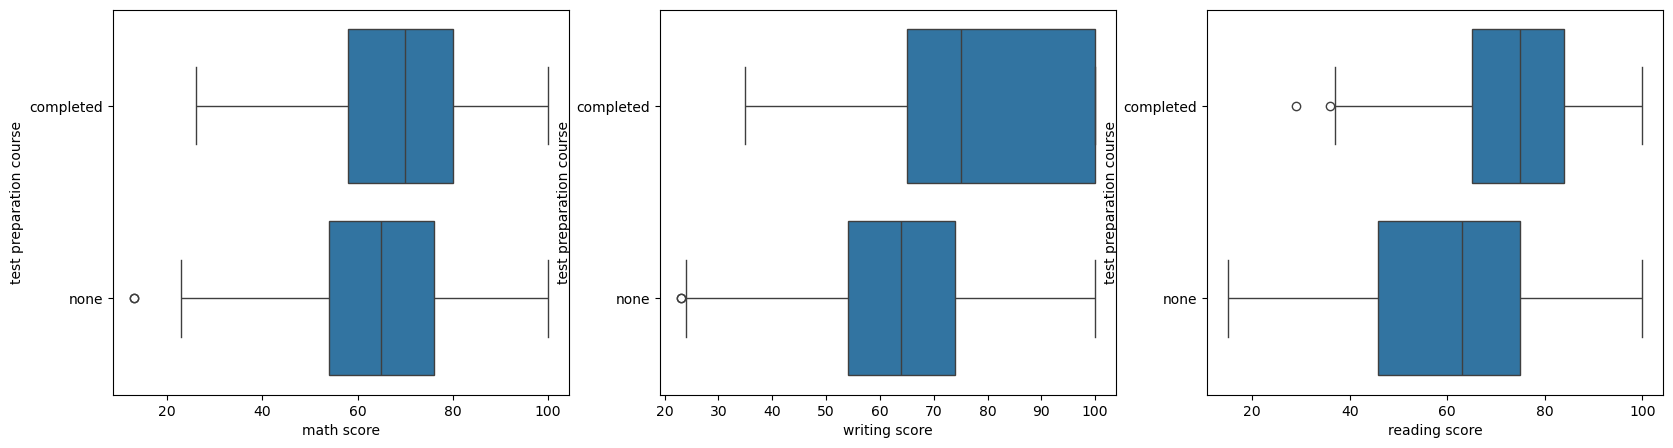

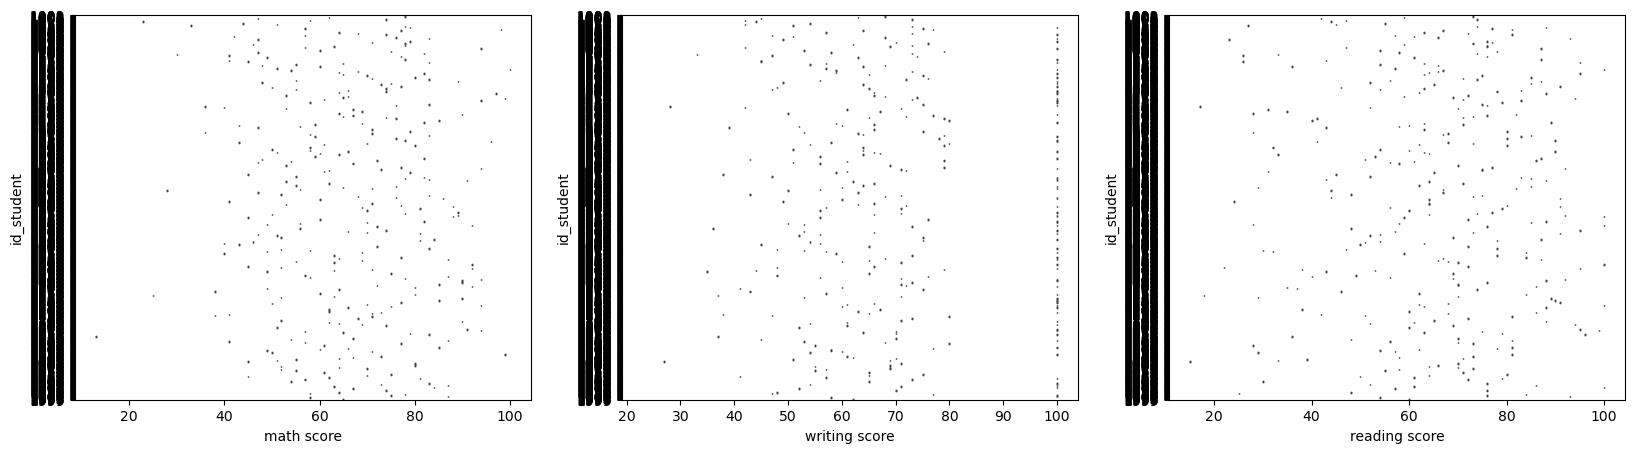

In [75]:
# VER SI HAY DIFERENCIAS EN NOTAS
for col in df.columns:
    if df[col].dtype == 'O':
        print(col)
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
        sns.boxplot (x='math score', y = col, data = df, ax = ax1)
        sns.boxplot (x='writing score', y = col, data = df, ax = ax2)
        sns.boxplot (x='reading score', y = col, data = df, ax = ax3)

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Lunch column 

### 2-variable Analysis with gender column 

### 2-variable Analysis with Test preparation course column 

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client